In [2]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def monte_carlo_integration(func, a, b, num_points=10000, visualize=False):

    # Generar puntos aleatorios
    x_random = np.random.uniform(a, b, num_points)
    y_max = max(func(x) for x in np.linspace(a, b, 1000))
    y_random = np.random.uniform(0, y_max, num_points)

    # Identificar puntos bajo y sobre la curva
    under_curve = y_random <= func(x_random)
    over_curve = ~under_curve

    # Calcular el área bajo la curva
    area_rectangle = (b - a) * y_max
    integral = (under_curve.sum() / num_points) * area_rectangle

    if visualize:
        # Gráfico con seaborn
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))

        # Curva de la función
        x = np.linspace(a, b, 1000)
        y = func(x)
        sns.lineplot(x=x, y=y, label='Función', color='blue', linewidth=2.5)

        # Puntos bajo la curva
        sns.scatterplot(x=x_random[under_curve], y=y_random[under_curve],
                        color='green', s=5, label='Puntos bajo la curva', alpha=0.6)

        # Puntos sobre la curva
        sns.scatterplot(x=x_random[over_curve], y=y_random[over_curve],
                        color='red', s=5, label='Puntos sobre la curva', alpha=0.6)

        # Configuración del gráfico
        plt.title('Integración Monte Carlo', fontsize=14)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('f(x)', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

    return integral

In [6]:
# Definir las funciones a integrar
def func1(x):
    return np.exp(x**2)

def func2(x):
    return np.exp(x**4)

def func3(x):
    return (1 - np.exp(x**2))**0.5

def func4(x):
    return x * (1 + np.exp(x**2))**-2

def func5(x):
    return np.exp(x + x**2)

def func6(x):
    return np.exp(-x)

def func7(x):
    return (1 - x**2)**(3/2)

# Calcular las integrales
integrals = [
    (func1, 0, 1),
    (func2, -1, 1),
    (func3, 0, 1),
    (func4, 0, np.inf),
    (func5, 0, 1),
    (func6, 0, np.inf),
    (func7, 0, 1)
]

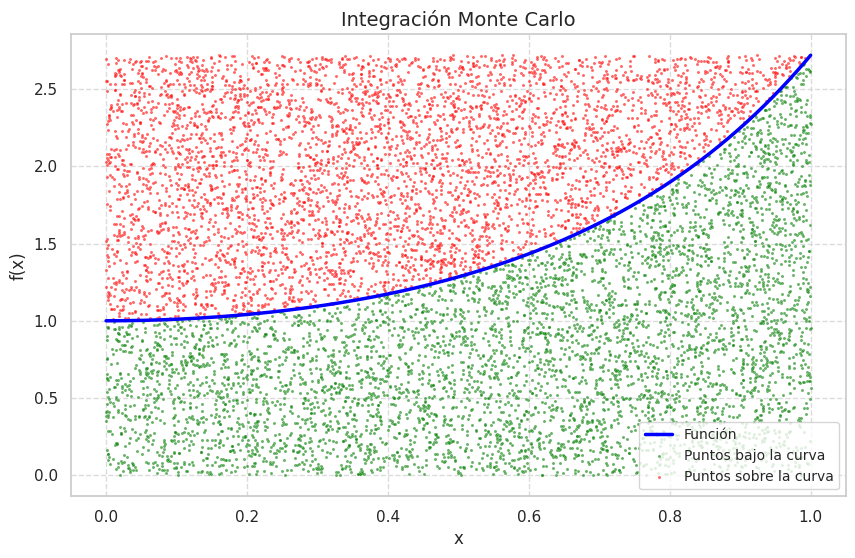

Integral 1: 1.4510188400314383


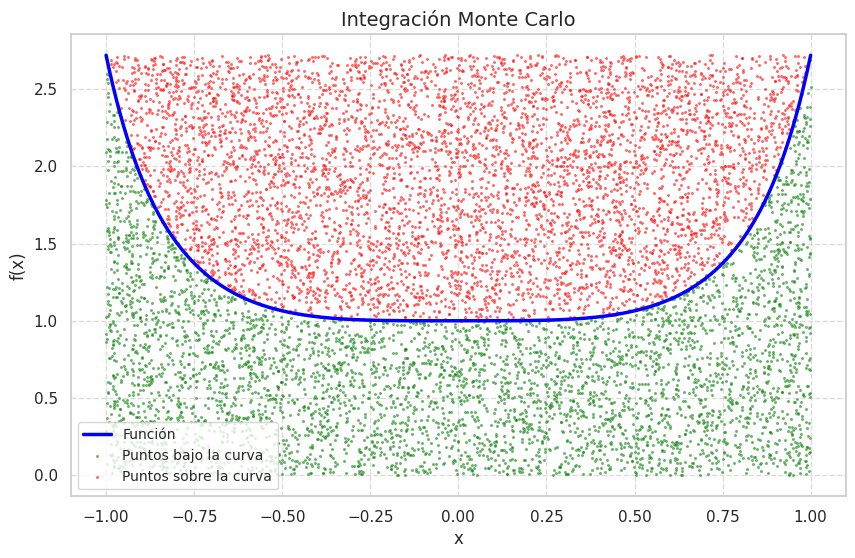

Integral 2: 2.5100614403990824


/tmp/ipykernel_22803/1153237399.py:9: RuntimeWarning: invalid value encountered in scalar power
  return (1 - np.exp(x**2))**0.5
/tmp/ipykernel_22803/1153237399.py:9: RuntimeWarning: invalid value encountered in sqrt
  return (1 - np.exp(x**2))**0.5


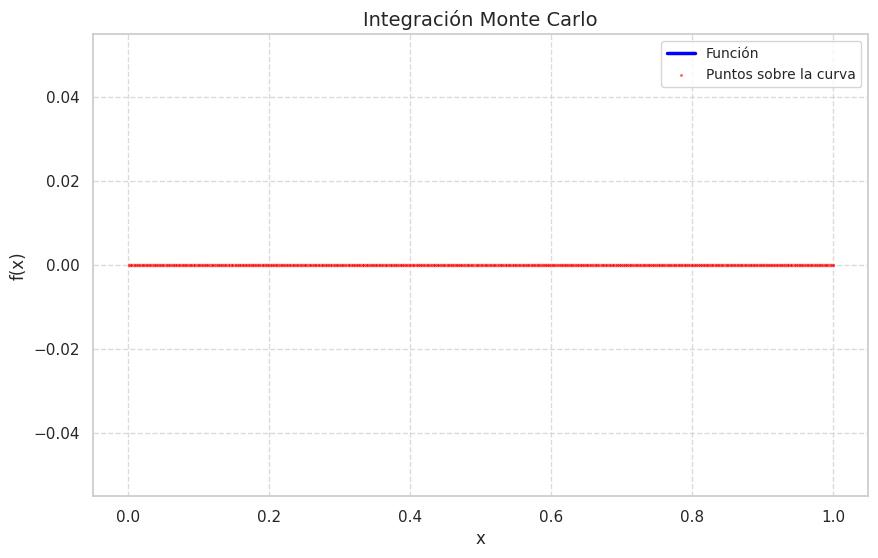

Integral 3: 0.0


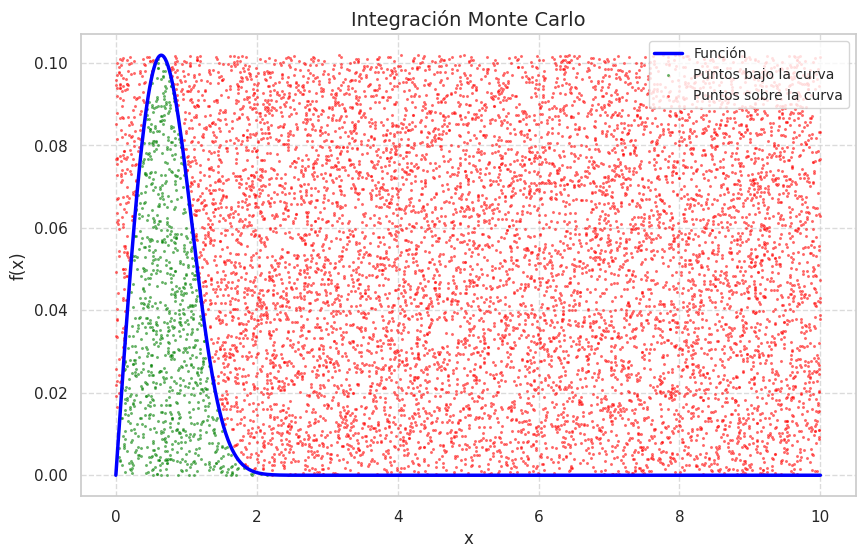

Integral 4: 0.09679948175061154


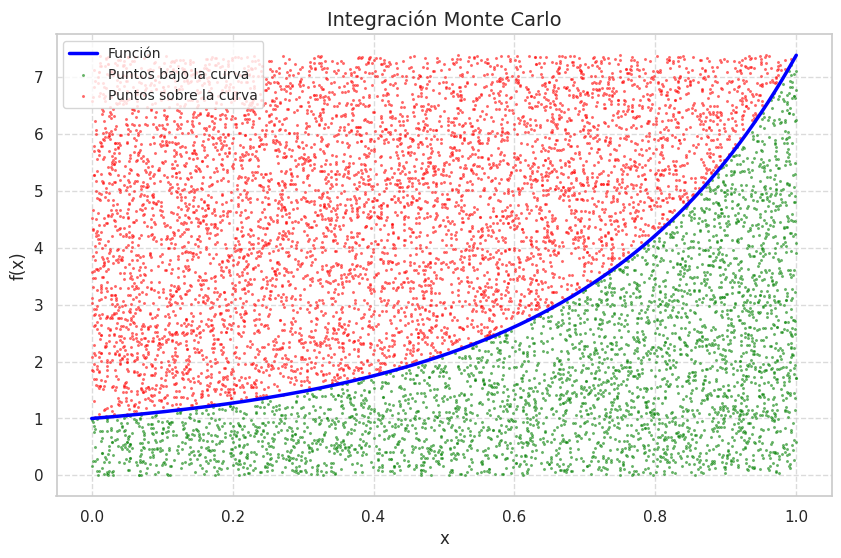

Integral 5: 2.7827185268572827


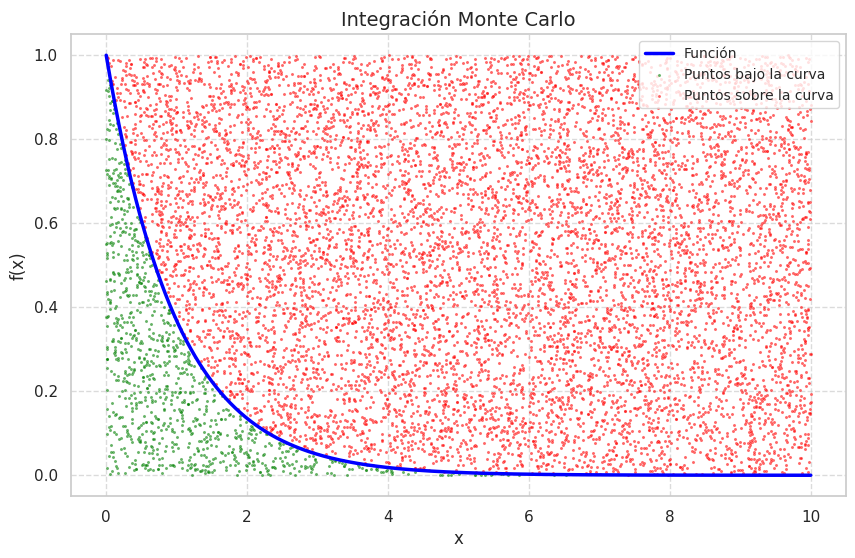

Integral 6: 0.999


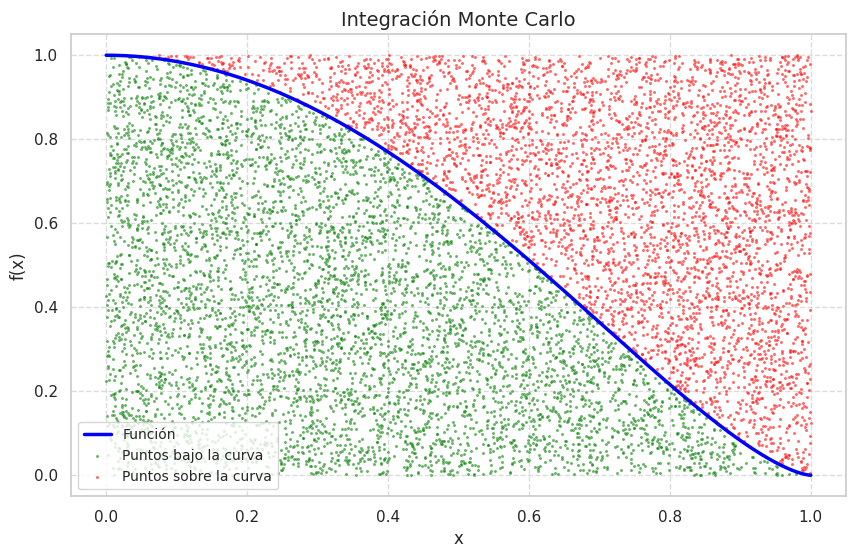

Integral 7: 0.5819


In [9]:
# Ejecutar y mostrar resultados
for i, (func, a, b) in enumerate(integrals, start=1):
    if b == np.inf:
        # En caso de infinito, se usa un rango suficientemente grande para la simulación
        b = 10
    result = monte_carlo_integration(func, a, b, num_points=10000, visualize=True)
    print(f"Integral {i}: {result}")